# Observations:Key metrics used for analysis are temperature, speed, thunder, max temperature and min temperature. Scatter plots of these metrics vs label do not show strong dependency, but when I threw the metrics into the regression, has led to an accuracy of 91%. I was able to toggle the no rain day to a rain day by changing the temperature on that day by 10 degrees. Also observed that when I go less than 10 iterations, the regression model throws out an error, probably due to less number of iterations. Confusion matrix demonstrates that the model is good in preidcting non rainy (83/92) days but fails in predicting the rainy days (1/8)

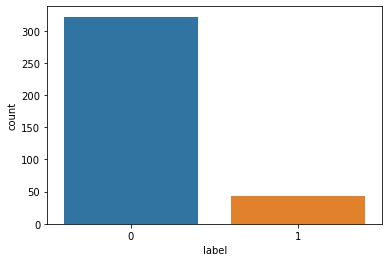

In [86]:

# >0.098 in precipitation is considered rain in the HW

#import pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

col_names = ['Date', 'Average_temperature', 'Wind_speed', 'Thunder', 'Max_temperature', 'Min_temperature', 'Prcipitation','label']

# Load dataset
History = pd.read_csv("1_year_data.csv", header = None, names=col_names, skiprows=[0])

# Plot number of rainy days
ax = sns.countplot(x="label", data=History) # 


In [87]:
feature_cols = ['Average_temperature', 'Wind_speed', 'Thunder', 'Max_temperature', 'Min_temperature']
X = History[feature_cols]
y = History.label
X

,Average_temperature,Wind_speed,Thunder,Max_temperature,Min_temperature
0,23,6.26,0,30,14
1,24,9.17,0,32,18
2,26,5.14,0,38,18
3,31,3.58,0,38,23
4,29,6.71,0,46,23
...,...,...,...,...,...
360,32,5.82,0,35,26
361,29,2.24,0,39,24
362,31,6.26,0,32,28
363,31,2.46,0,34,29


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=0)
X_test

,Average_temperature,Wind_speed,Thunder,Max_temperature,Min_temperature
106,51,8.95,0,63,41
259,57,4.47,0,69,50
45,41,7.61,0,43,32
26,39,6.49,0,49,31
78,50,10.74,0,68,32
...,...,...,...,...,...
204,79,8.72,0,89,65
269,63,6.71,0,71,50
281,46,15.88,0,49,33
289,60,8.05,0,67,41


# Accuracy of prediction

In [94]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=500)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))



Accuracy: 0.9130434782608695


# Confusion matrix

In [90]:
confusion_matrix(y_test, y_pred)

array([[83,  1],
       [ 7,  1]], dtype=int64)

# Trying to toggle the output

In [91]:
new_input =  [[41, 6.26, 1, 50, 36]]
prediction = logreg.predict(new_input)
prediction[0]


0

In [92]:
# Changing average temperature by +10 changed the prediction to YES
new_input =  [[51, 6.26, 1, 50, 36]]
prediction = logreg.predict(new_input)
prediction[0]

1

# Understanding the data

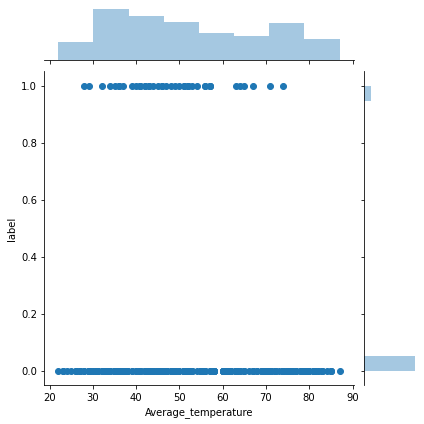

In [72]:

#ax1 = df.plot.scatter(label, label)
ax = sns.jointplot(x="Average_temperature", y="label", data=History) # 
#ax = sns.scatterplot(x="Wind_speed", y="label", data=History) # 
#ax = sns.scatterplot(x="Thunder", y="label", data=History) # 
#ax = sns.scatterplot(x="Max_temperature", y="label", data=History) # 
#ax = sns.scatterplot(x="Min_temperature", y="label", data=History) # 


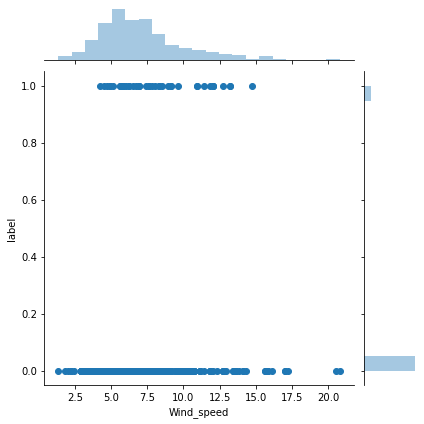

In [73]:
ax = sns.jointplot(x="Wind_speed", y="label", data=History) # 


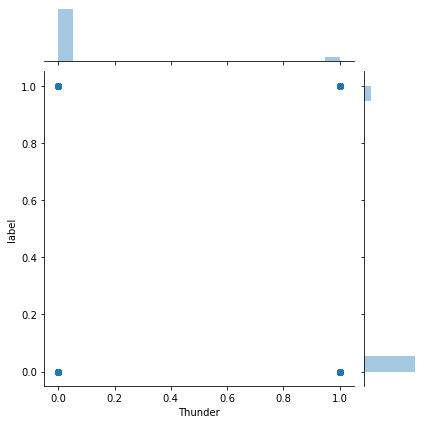

In [74]:

ax = sns.jointplot(x="Thunder", y="label", data=History) # 


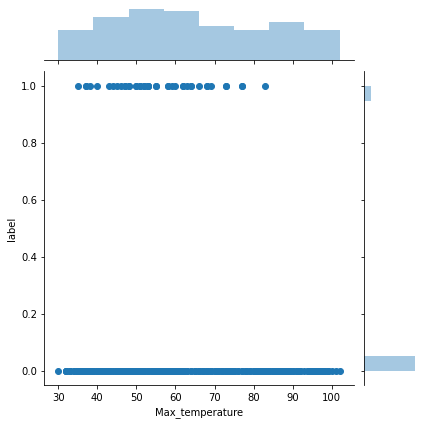

In [75]:
ax = sns.jointplot(x="Max_temperature", y="label", data=History) # 


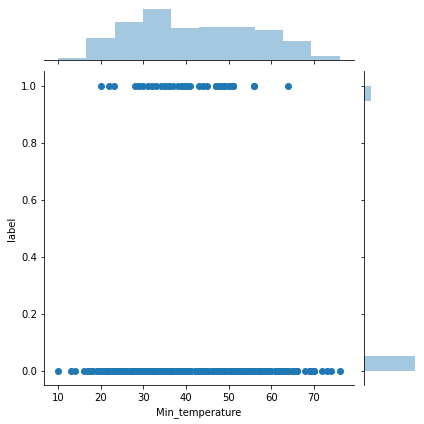

In [76]:
ax = sns.jointplot(x="Min_temperature", y="label", data=History) # 